In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))
from msd import fillin2, MSD_iteration, vectorized_MMSD_calcs
import numpy as np

In [ ]:
os.chdir('/Users/ajoseph/Desktop/brain_diffusion/brain_diffusion/0301_Nanocurc/PLGA/')
for filename in os.listdir():
    newname =  filename.replace('P', 'Traj_P')
    newname2 = newname.replace('.csv','.tif.csv')
    os.rename(filename,newname2)

In [ ]:
folder='/Users/ajoseph/Desktop/brain_diffusion/brain_diffusion/0301_Nanocurc/PEG/'
os.chdir('/Users/ajoseph/Desktop/brain_diffusion/brain_diffusion/0301_Nanocurc/PEG/')
for filename in os.listdir():
    test = np.genfromtxt(folder+filename, delimiter=',')
    x = np.delete(test, (0), axis=0)
    np.savetxt(folder+filename, x, delimiter=',')

In [ ]:
folder='/Users/ajoseph/Desktop/brain_diffusion/brain_diffusion/0301_Nanocurc/PLGA/'
name='PLGA_Cortex'
(total1, frames, x_m, y_m, xs_m, ys_m)=MSD_iteration(folder,name,cut=2,totvids=23,conversion=(99.93,.16,1))
(geoM2xy, gSEM, SM1x, SM1y, SM2xy)=vectorized_MMSD_calcs(frames, total1, xs_m, ys_m)
DIR=folder+'MSD_files/'
np.savetxt(DIR+'geoM2xy_'+name+'.csv', geoM2xy, delimiter=',')
np.savetxt(DIR+'gSEM_'+name+'.csv', gSEM, delimiter=',')
np.savetxt(DIR+'SM1x_'+name+'.csv', SM1x, delimiter=',')
np.savetxt(DIR+'SM1y_'+name+'.csv', SM1y, delimiter=',')
np.savetxt(DIR+'SM2xy_'+name+'.csv', SM2xy, delimiter=',')

In [ ]:
x_m

In [ ]:
MSD_iteration?

In [ ]:
folder='/Users/ajoseph/Desktop/brain_diffusion/brain_diffusion/0301_Nanocurc/PLGA/'
name='PLGA_Midbrain'
(total1, frames, x_m, y_m, xs_m, ys_m)=MSD_iteration(folder,name,cut=2,totvids=28,conversion=(99.93,.16,1))
(geoM2xy, gSEM, SM1x, SM1y, SM2xy)=vectorized_MMSD_calcs(frames, total1, xs_m, ys_m)
DIR=folder+'MSD_files/'
np.savetxt(DIR+'geoM2xy_'+name+'.csv', geoM2xy, delimiter=',')
np.savetxt(DIR+'gSEM_'+name+'.csv', gSEM, delimiter=',')
np.savetxt(DIR+'SM1x_'+name+'.csv', SM1x, delimiter=',')
np.savetxt(DIR+'SM1y_'+name+'.csv', SM1y, delimiter=',')
np.savetxt(DIR+'SM2xy_'+name+'.csv', SM2xy, delimiter=',')

In [ ]:
folder='/Users/ajoseph/Desktop/brain_diffusion/brain_diffusion/0301_Nanocurc/PEG/'
name='PEG_Cortex'
(total1, frames, x_m, y_m, xs_m, ys_m)=MSD_iteration(folder,name,cut=2,totvids=33,conversion=(99.93,.16,1))
(geoM2xy, gSEM, SM1x, SM1y, SM2xy)=vectorized_MMSD_calcs(frames, total1, xs_m, ys_m)
DIR=folder+'MSD_files/'
np.savetxt(DIR+'geoM2xy_'+name+'.csv', geoM2xy, delimiter=',')
np.savetxt(DIR+'gSEM_'+name+'.csv', gSEM, delimiter=',')
np.savetxt(DIR+'SM1x_'+name+'.csv', SM1x, delimiter=',')
np.savetxt(DIR+'SM1y_'+name+'.csv', SM1y, delimiter=',')
np.savetxt(DIR+'SM2xy_'+name+'.csv', SM2xy, delimiter=',')

In [ ]:
folder='/Users/ajoseph/Desktop/brain_diffusion/brain_diffusion/0301_Nanocurc/PEG/'
name='PEG_Midbrain'
(total1, frames, x_m, y_m, xs_m, ys_m)=MSD_iteration(folder,name,cut=2,totvids=28,conversion=(99.93,.16,1))
(geoM2xy, gSEM, SM1x, SM1y, SM2xy)=vectorized_MMSD_calcs(frames, total1, xs_m, ys_m)
DIR=folder+'MSD_files/'
np.savetxt(DIR+'geoM2xy_'+name+'.csv', geoM2xy, delimiter=',')
np.savetxt(DIR+'gSEM_'+name+'.csv', gSEM, delimiter=',')
np.savetxt(DIR+'SM1x_'+name+'.csv', SM1x, delimiter=',')
np.savetxt(DIR+'SM1y_'+name+'.csv', SM1y, delimiter=',')
np.savetxt(DIR+'SM2xy_'+name+'.csv', SM2xy, delimiter=',')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
sys.path.append(os.path.abspath('/Users/ajoseph/Desktop/brain_diffusion/brain_diffusion/histogram'))
from histogram_utils import histogram_by_video

In [13]:
folder='/Users/ajoseph/Desktop/brain_diffusion/brain_diffusion/0301_Nanocurc/histogram_data/SM2xy_'
xlabel='Log D_eff'
ylabel='% Particles'
fps=99.93
frame=100
analysis='log'
theta='D'
test_bins = np.linspace(-8, 2, 50)

In [4]:
sample='PEG_Cortex.csv'
SMfilename=folder+sample

# load data
SM2xy = np.genfromtxt(SMfilename, delimiter=",")

toi = frame/fps
factor = 4*toi

dist1 = ma.log10(SM2xy[frame, :]/factor)

unmask = np.invert(ma.getmask(dist1))
dist1 = dist1[unmask]
[histogram1, test_bins] = np.histogram(dist1, bins=test_bins)

In [5]:
sample='PEG_Midbrain.csv'
SMfilename=folder+sample

# load data
SM2xy = np.genfromtxt(SMfilename, delimiter=",")

toi = frame/fps
factor = 4*toi

dist2 = ma.log10(SM2xy[frame, :]/factor)

unmask = np.invert(ma.getmask(dist2))
dist2 = dist2[unmask]
[histogram2, test_bins] = np.histogram(dist2, bins=test_bins)

In [6]:
sample='PLGA_Cortex.csv'
SMfilename=folder+sample

# load data
SM2xy = np.genfromtxt(SMfilename, delimiter=",")

toi = frame/fps
factor = 4*toi

dist3 = ma.log10(SM2xy[frame, :]/factor)

unmask = np.invert(ma.getmask(dist3))
dist3 = dist3[unmask]
[histogram3, test_bins] = np.histogram(dist3, bins=test_bins)

In [7]:
sample='PLGA_Midbrain.csv'
SMfilename=folder+sample

# load data
SM2xy = np.genfromtxt(SMfilename, delimiter=",")

toi = frame/fps
factor = 4*toi

dist4 = ma.log10(SM2xy[frame, :]/factor)

unmask = np.invert(ma.getmask(dist4))
dist4 = dist4[unmask]
[histogram4, test_bins] = np.histogram(dist4, bins=test_bins)

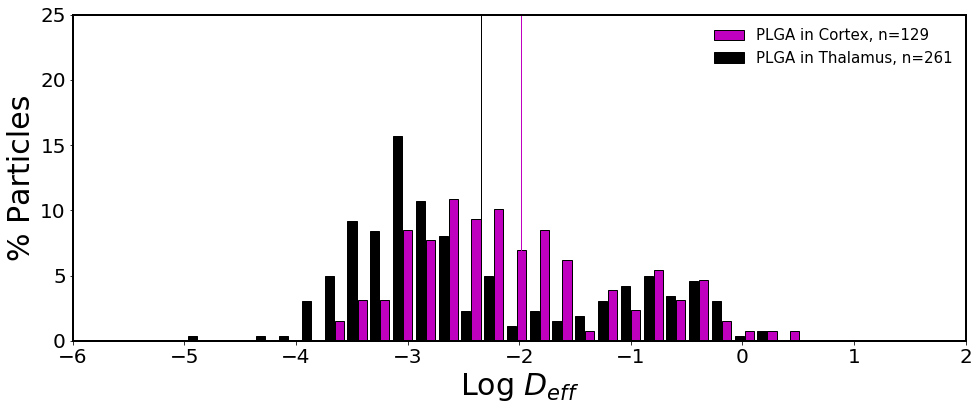

In [22]:
# Plot_general_histogram_code
avg1 = np.mean(dist1)
avg2 = np.mean(dist2)
plt.rcParams["patch.force_edgecolor"] = True
fig = plt.figure(figsize=(16, 6))
plt.rc('axes', linewidth=2)
plot1 = histogram1
plot2 = histogram2
bins = test_bins
width = 0.4 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:])/2
plt.bar(center, plot1/sum(plot1)*100, align='center', width=width, color='m', label='PLGA in Cortex, n=129')
plt.bar(center-0.09, plot2/sum(plot2)*100, align='center', width=width, color='k', label='PLGA in Thalamus, n=261')
plt.axvline(avg1, color='m', linewidth=1)
plt.axvline(avg2, color='k', linewidth=1)
plt.xlabel('Log $D_{eff}$', fontsize=30)
plt.ylabel(ylabel, fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)


plt.gca().set_ylim([0, 25])
plt.gca().set_xlim([-6, 2])

plt.legend(fontsize=15, frameon=False)
plt.show()
#plt.savefig(folder+'PEG_hist.png', bbox_inches='tight')

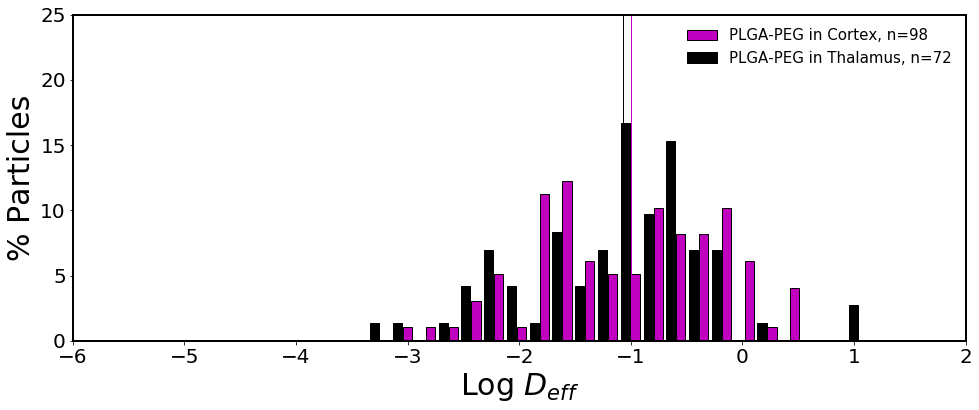

In [23]:
# Plot_general_histogram_code
avg3 = np.mean(dist3)
avg4 = np.mean(dist4)
plt.rcParams["patch.force_edgecolor"] = True
fig = plt.figure(figsize=(16, 6))
plt.rc('axes', linewidth=2)
plot3 = histogram3
plot4 = histogram4
bins = test_bins
width = 0.4 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:])/2
plt.bar(center, plot3/sum(plot3)*100, align='center', width=width, color='m', label='PLGA-PEG in Cortex, n=98')
plt.bar(center-0.09, plot4/sum(plot4)*100, align='center', width=width, color='k', label='PLGA-PEG in Thalamus, n=72')
plt.axvline(avg3, color='m', linewidth=1)
plt.axvline(avg4, color='k', linewidth=1)
plt.xlabel('Log $D_{eff}$', fontsize=30)
plt.ylabel(ylabel, fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)


plt.gca().set_ylim([0, 25])
plt.gca().set_xlim([-6, 2])

plt.legend(fontsize=15, frameon=False)
plt.show()
#plt.savefig(folder+'PEG_hist.png', bbox_inches='tight')

In [ ]:
np.power(10,avg3)/np.power(10,avg1)

In [ ]:
[np.power(10,avg1),
np.power(10,avg2),
np.power(10,avg3),
np.power(10,avg4)]

In [ ]:
np.power(10,avg4)/np.power(10,avg2)

In [ ]:
dist4.shape